In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Merging 12 months of sales data into single file

In [2]:
csv_files = ['Sales_January_2019.csv','Sales_February_2019.csv','Sales_March_2019.csv',
               'Sales_April_2019.csv','Sales_May_2019.csv','Sales_June_2019.csv',
               'Sales_July_2019.csv','Sales_August_2019.csv','Sales_September_2019.csv','Sales_October_2019.csv',
              'Sales_November_2019.csv','Sales_December_2019.csv']

df1 = pd.read_csv(csv_files[0])
df2 = pd.read_csv(csv_files[1])
df3 = pd.read_csv(csv_files[2])
df4 = pd.read_csv(csv_files[3])
df5 = pd.read_csv(csv_files[4])
df6 = pd.read_csv(csv_files[5])
df7 = pd.read_csv(csv_files[6])
df8 = pd.read_csv(csv_files[7])
df9 = pd.read_csv(csv_files[8])
df10 = pd.read_csv(csv_files[9])
df11= pd.read_csv(csv_files[10])
df12= pd.read_csv(csv_files[11])


merged_df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10])
df = pd.concat([merged_df,df11,df12])

df.to_csv('Sales.csv')

In [4]:
Sales = pd.read_csv("Sales.csv")

In [6]:
pd.set_option('display.max_rows',None)
len(Sales)

186850

# Data Cleaning

Drop rows with NaN

In [5]:
nan_df = Sales[Sales.isna().any(axis=1)]
nan_df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,664,NaN,NaN,NaN,NaN,NaN,NaN
678,678,NaN,NaN,NaN,NaN,NaN,NaN
797,797,NaN,NaN,NaN,NaN,NaN,NaN
876,876,NaN,NaN,NaN,NaN,NaN,NaN
1299,1299,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
Sales = Sales.dropna(how='any')
Sales.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


Find and Delete 'Or'

In [7]:
temp_df = Sales[Sales['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
Sales = Sales[Sales['Order Date'].str[0:2] != 'Or']

1] Adding month column

# Augmenting data with additional columns

In [9]:
Sales['Month'] = Sales['Order Date'].str[0:2]
Sales['Month'] = Sales['Month'].astype('int32')
Sales.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


# What was the best month for sale? How much was earned that month?


In [10]:
Sales['Price Each']=Sales['Price Each'].astype('float32')
Sales['Price Each'].dtype

dtype('float32')

In [11]:
#We wiil first add a sales amt column which is equal to multiplication of Quantity Orderd and Price Each
Sales['Quantity Ordered']=Sales['Quantity Ordered'].astype('int32')
Sales['Quantity Ordered'].dtype

dtype('int32')

In [12]:
#Adding Total Sales column
Sales['Total Sales'] = Sales['Quantity Ordered']*Sales['Price Each']
Sales.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
0,0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.000000
1,1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.950000
2,2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.980000
3,3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.990005
4,4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.990000


In [13]:
Sales.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
0,0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.000000
1,1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.950000
2,2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.980000
3,3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.990005
4,4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.990000


In [14]:
Sales_By_Month = Sales.groupby('Month').sum()
Sales_By_Month

,Unnamed: 0,Quantity Ordered,Price Each,Total Sales
Month,,,,
1,47433245,10903,1811768.375,1.822257e+06
2,72123197,13449,2188884.750,2.202022e+06
3,115333587,17005,2791207.750,2.807100e+06
4,167977608,20558,3367671.000,3.390670e+06
5,137829259,18667,3135125.000,3.152607e+06
6,92330356,15253,2562025.500,2.577802e+06
7,102752005,16072,2632539.500,2.647776e+06
8,71824951,13448,2230345.500,2.244468e+06
9,67863032,13109,2084992.125,2.097560e+06


In [15]:
Sales_By_Month['Total Sales'].max()

4613443.316063166

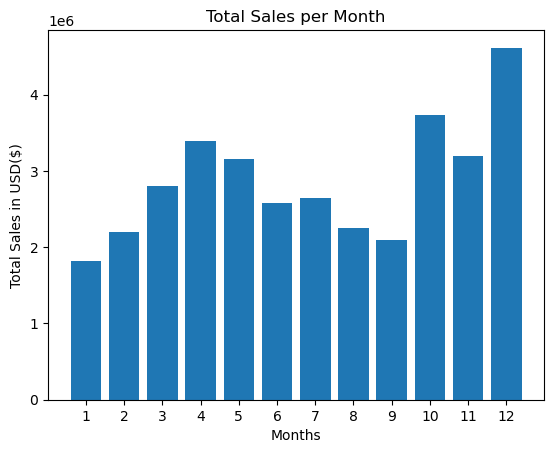

In [16]:
#plotting
months = range(1,13)

plt.bar(months,Sales_By_Month['Total Sales'])
plt.title('Total Sales per Month')
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Total Sales in USD($)')
plt.show()

# What city has higest number of sales?

In [17]:
#Add a city column
Sales.shape

(185950, 9)

In [18]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    address = address.split(',')[2]
    return address.split(' ')[1]

# Sales['City'] = Sales['Purchase Address'].apply(lambda x:get_city(x)+' '+get_state(x))
Sales['City'] = Sales['Purchase Address'].apply(lambda x:f"{get_city(x)}({get_state(x)})")

In [19]:
Sales.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.000000,Boston(MA)
1,1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.950000,Portland(OR)
2,2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.980000,San Francisco(CA)
3,3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.990005,Los Angeles(CA)
4,4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.990000,Austin(TX)


In [20]:
Sales_By_city = Sales.groupby('City').sum()

In [21]:
Sales_By_city

,Unnamed: 0,Quantity Ordered,Price Each,Month,Total Sales
City,,,,,
Atlanta(GA),122928154,16602,2779908.250,104794,2.795499e+06
Austin(TX),82709457,11153,1809873.625,69829,1.819582e+06
Boston(MA),165758780,22528,3637409.750,141112,3.661642e+06
Dallas(TX),124308328,16730,2752627.750,104620,2.767975e+06
Los Angeles(CA),247743297,33289,5421435.000,208325,5.452571e+06
New York City(NY),208439450,27932,4635371.000,175741,4.664317e+06
Portland(ME),20641344,2750,447189.250,17144,4.497583e+05
Portland(OR),83402354,11303,1860558.250,70621,1.870732e+06
San Francisco(CA),372569180,50239,8211461.500,315520,8.262204e+06


Text(0, 0.5, 'Total Sales')

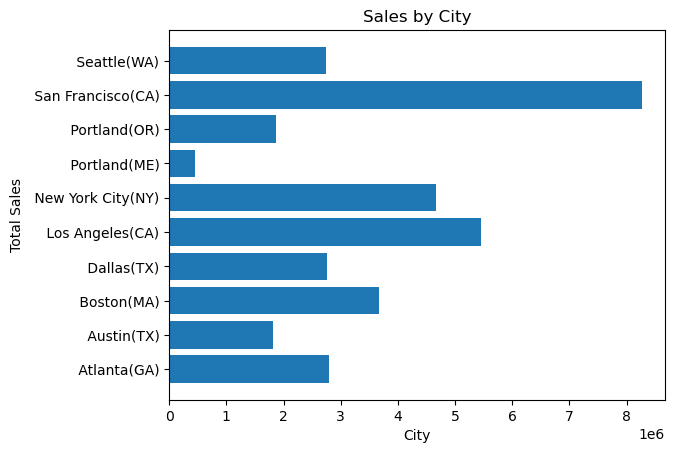

In [22]:
# Cities=['Atlanta(GA)','Austin(TX)','Boston(MA)','Dallas(TX)','Los Angeles(CA)',' New York City(NY)','Portland(ME)','Portland(OR)',' San Francisco(CA)','Seattle(WA)']
Cities = [city for city, df in Sales.groupby('City')]
plt.barh(Cities,Sales_By_city['Total Sales'])
plt.title('Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')

# what time should we display advertisements to maximize likelihood of customers buying the product?


In [23]:
Sales.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.000000,Boston(MA)
1,1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.950000,Portland(OR)
2,2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.980000,San Francisco(CA)
3,3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.990005,Los Angeles(CA)
4,4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.990000,Austin(TX)


In [24]:
Sales['Order Date'] = pd.to_datetime(Sales['Order Date'])

In [25]:
Sales.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,0,141234,iPhone,1,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.000000,Boston(MA)
1,1,141235,Lightning Charging Cable,1,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.950000,Portland(OR)
2,2,141236,Wired Headphones,2,11.990000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.980000,San Francisco(CA)
3,3,141237,27in FHD Monitor,1,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.990005,Los Angeles(CA)
4,4,141238,Wired Headphones,1,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.990000,Austin(TX)


In [26]:
Sales['Hour'] = Sales['Order Date'].dt.hour
Sales['Minute'] = Sales['Order Date'].dt.minute

In [27]:
Sales.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour,Minute
0,0,141234,iPhone,1,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.000000,Boston(MA),21,25
1,1,141235,Lightning Charging Cable,1,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.950000,Portland(OR),14,15
2,2,141236,Wired Headphones,2,11.990000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.980000,San Francisco(CA),13,33
3,3,141237,27in FHD Monitor,1,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.990005,Los Angeles(CA),20,33
4,4,141238,Wired Headphones,1,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.990000,Austin(TX),11,59


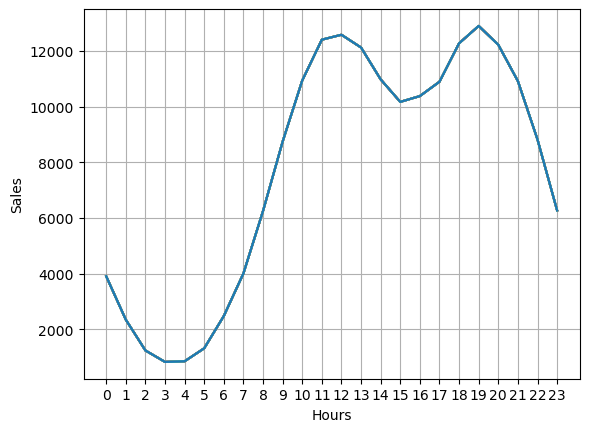

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Minute
Hour,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


In [28]:
Hours = [hour for hour, df in Sales.groupby('Hour')]

plt.plot(Hours,Sales.groupby(['Hour']).count())
plt.xticks(Hours)
plt.xlabel('Hours')
plt.ylabel('Sales')
plt.grid()
plt.show()
Sales.groupby(['Hour']).count()


# What products are most often sold together?

In [35]:
df = Sales[Sales['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df.head()

C:\Users\ujjwa\AppData\Local\Temp\ipykernel_2316\1852281679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour,Minute,Grouped
41,41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin(TX),16,6,"USB-C Charging Cable,Wired Headphones"
42,42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin(TX),16,6,"USB-C Charging Cable,Wired Headphones"
57,57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles(CA),8,25,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles(CA),8,25,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City(NY),11,19,"Vareebadd Phone,Wired Headphones"


In [40]:
df = df[['Order ID','Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [42]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

# What product Sold the most? Why do you think it sold the most? 

In [55]:
# count = Counter
# for row in Sales['Product']

Most_Sold = Sales.groupby('Product')
Most_Ordered = Most_Sold.sum()['Quantity Ordered']



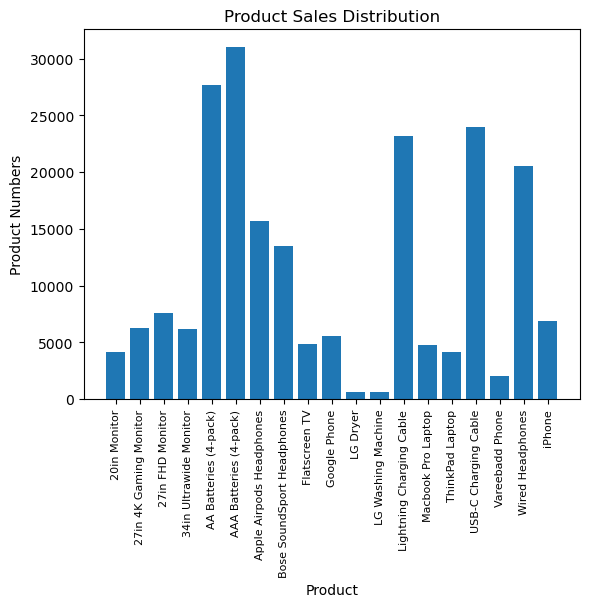

In [66]:
Products = [product for product, df in Most_Sold]
plt.bar(Products,Most_Ordered)
plt.xticks(rotation='vertical',size=8)
plt.title('Product Sales Distribution')
plt.xlabel('Product')
plt.ylabel('Product Numbers')
plt.show()

C:\Users\ujjwa\AppData\Local\Temp\ipykernel_2316\2176152588.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Products,rotation='vertical',size=8)


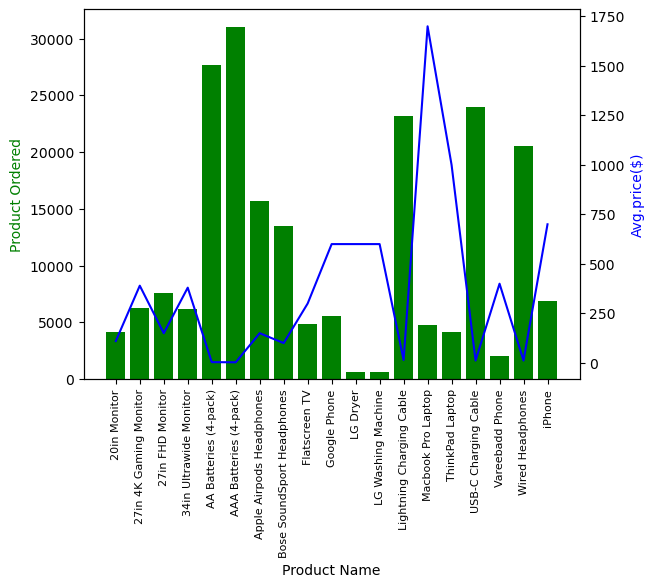

In [83]:
#Now we will overlay this with prices to show the relation between prices and Orders
prices = Sales.groupby('Product').mean()['Price Each']
Products = [product for product, df in Most_Sold]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(Products,Most_Ordered,color='g')
ax2.plot(Products,prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Product Ordered',color='g')
ax2.set_ylabel('Avg.price($)',color='b')
ax1.set_xticklabels(Products,rotation='vertical',size=8)
plt.show()